# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [182]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [183]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 540


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [184]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

    # Indicate that Data Loading is complete
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san martin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | imranli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | grytviken
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | taoudenni
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | holualoa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | bubaque
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set

In [185]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [186]:
# Show Record Count
city_data_df.count()

City          513
Lat           513
Lng           513
Max Temp      513
Humidity      513
Cloudiness    513
Windspeed     513
Country       513
Date          513
dtype: int64

In [187]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,san martin,-33.0810,-68.4681,14.30,19,6,3.60,AR,1722814142
1,imranli,39.8754,38.1136,16.66,67,0,1.75,TR,1722814163
2,whitehorse,60.7161,-135.0538,23.94,31,20,0.89,CA,1722814164
3,grytviken,-54.2811,-36.5092,-1.05,93,99,3.36,GS,1722813916
4,taoudenni,22.6783,-3.9836,38.76,12,0,5.28,ML,1722814013


In [188]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [189]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,san martin,-33.0810,-68.4681,14.30,19,6,3.60,AR,1722814142
1,imranli,39.8754,38.1136,16.66,67,0,1.75,TR,1722814163
2,whitehorse,60.7161,-135.0538,23.94,31,20,0.89,CA,1722814164
3,grytviken,-54.2811,-36.5092,-1.05,93,99,3.36,GS,1722813916
4,taoudenni,22.6783,-3.9836,38.76,12,0,5.28,ML,1722814013


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [190]:
#Extract the columns needed from the dataframe for the plots
plot_lat = city_data_df["Lat"]
plot_max_temp = city_data_df["Max Temp"]
plot_humidity = city_data_df["Humidity"]
plot_cloudiness = city_data_df["Cloudiness"]
plot_wind_speed = city_data_df["Windspeed"]

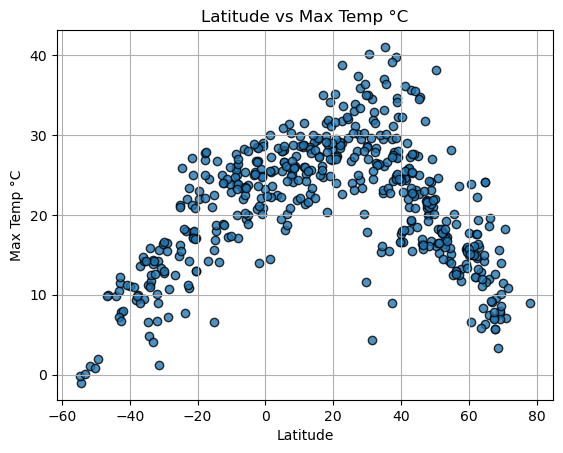

In [191]:
# Build scatter plot for latitude vs. temperature
plt.scatter(plot_lat,
            plot_max_temp,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temp °C")
plt.ylabel("Max Temp °C")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

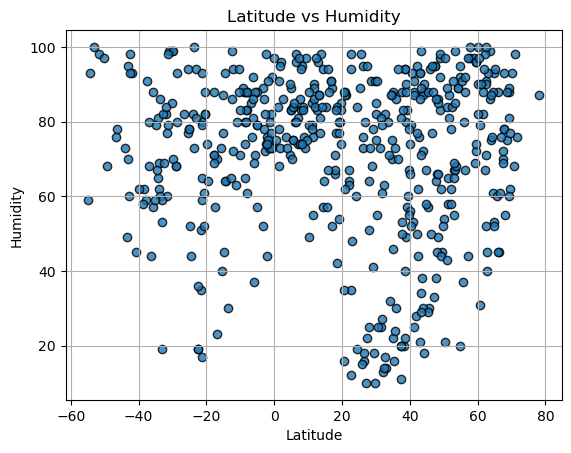

In [192]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(plot_lat,
            plot_humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

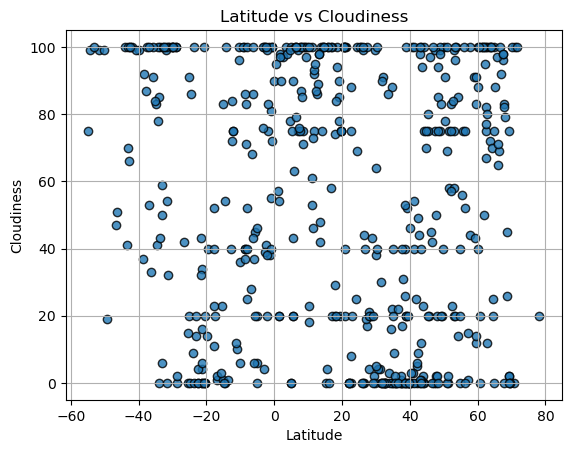

In [193]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(plot_lat,
            plot_cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

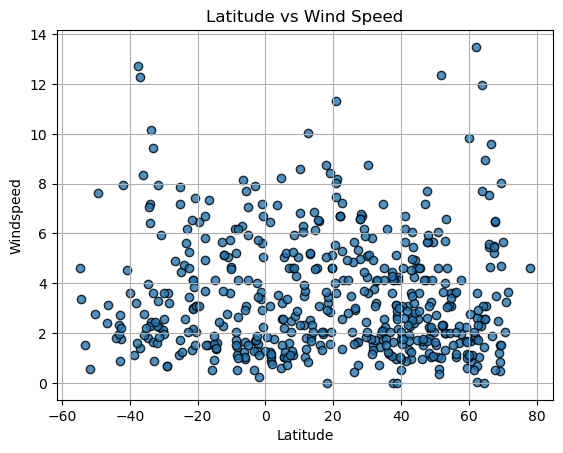

In [194]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(plot_lat,
            plot_wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [195]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot features
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r^2-value is: {rvalue}")
    plt.show()

In [196]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
1,imranli,39.8754,38.1136,16.66,67,0,1.75,TR,1722814163
2,whitehorse,60.7161,-135.0538,23.94,31,20,0.89,CA,1722814164
4,taoudenni,22.6783,-3.9836,38.76,12,0,5.28,ML,1722814013
5,holualoa,19.6228,-155.9522,26.91,85,75,4.63,US,1722814167
6,bubaque,11.2833,-15.8333,25.99,85,100,3.49,GW,1722814168


In [197]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,san martin,-33.0810,-68.4681,14.30,19,6,3.60,AR,1722814142
3,grytviken,-54.2811,-36.5092,-1.05,93,99,3.36,GS,1722813916
8,puerto natales,-51.7236,-72.4875,1.08,98,99,0.54,CL,1722814170
9,margaret river,-33.9500,115.0667,15.83,69,85,6.44,AU,1722814172
12,yaren,-0.5472,166.9160,29.08,73,100,6.70,NR,1722814176


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6192240715454691


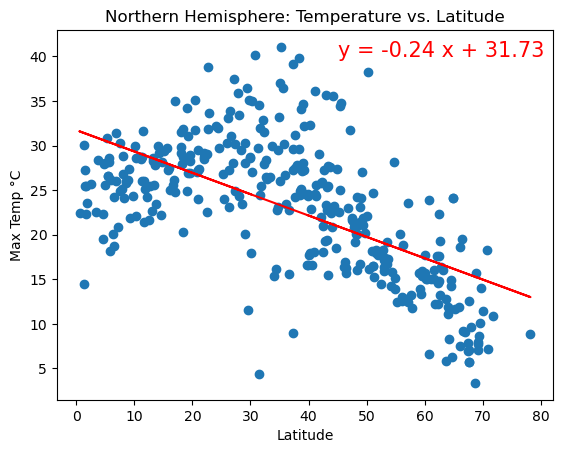

In [198]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.title(f"Northern Hemisphere: Temperature vs. Latitude")
plt.ylabel("Max Temp °C")

plot_linear_regression(x_values,y_values, 'Latitude', (45,40))

The r^2-value is: 0.8312989553846823


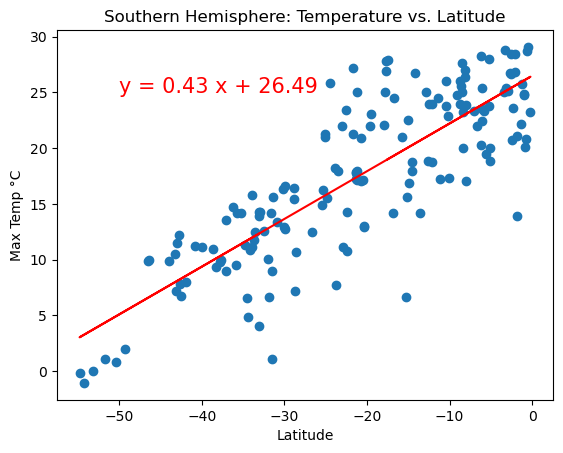

In [206]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.title(f"Southern Hemisphere: Temperature vs. Latitude")
plt.ylabel("Max Temp °C")

plot_linear_regression(x_values,y_values, 'Latitude', (-50,25))

**Discussion about the linear relationship:** The linear regression model for the Northern Hemisphere indicates that there is a strong, negative correlation between latitude and temperature, meaning temperature decreases as distance from the equator increases. The linear regression model for the Southern Hemisphere indicates that there is a strong, positive correlation between latitude and temperature, meaning temperature increases as distance to the equator decreases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.02635659529117176


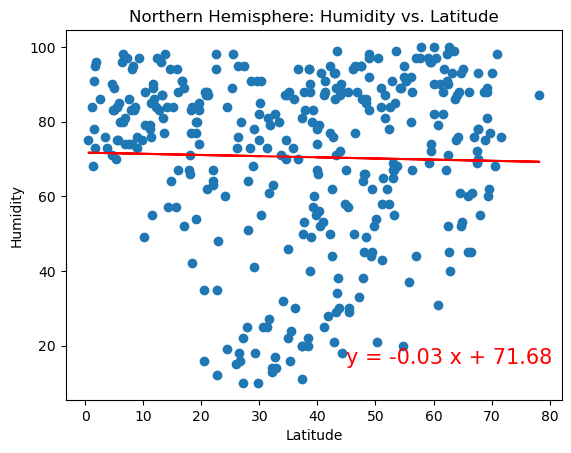

In [200]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.title(f"Northern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")

plot_linear_regression(x_values,y_values, 'Latitude', (45,15))

The r^2-value is: 0.04756659036393277


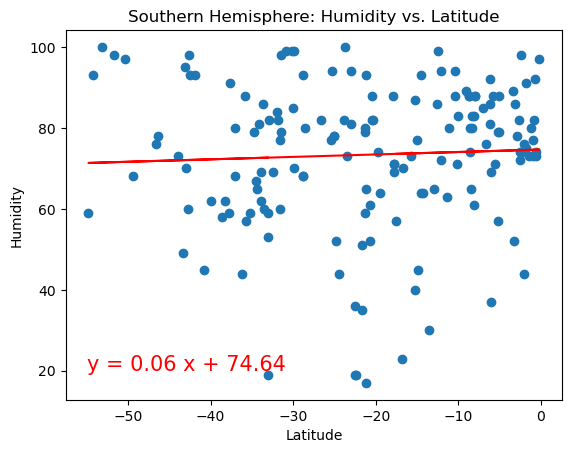

In [201]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.title(f"Southern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")

plot_linear_regression(x_values,y_values, 'Latitude', (-55,20))

**Discussion about the linear relationship:** The linear regression models for both the Northern and Southern Hemispheres indicate that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.08919414280146996


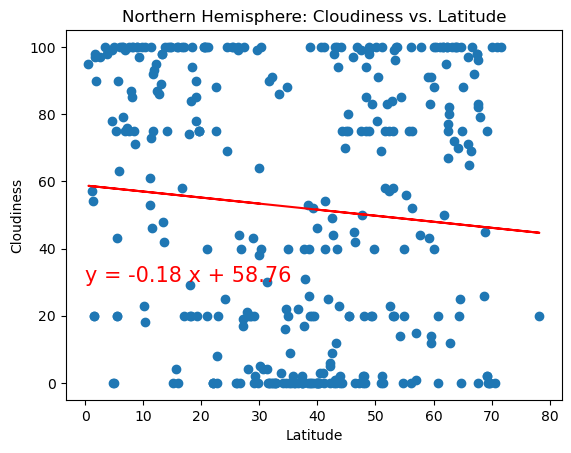

In [202]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.title(f"Northern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")

plot_linear_regression(x_values,y_values, 'Latitude', (0,30))

The r^2-value is: -0.1867992968507111


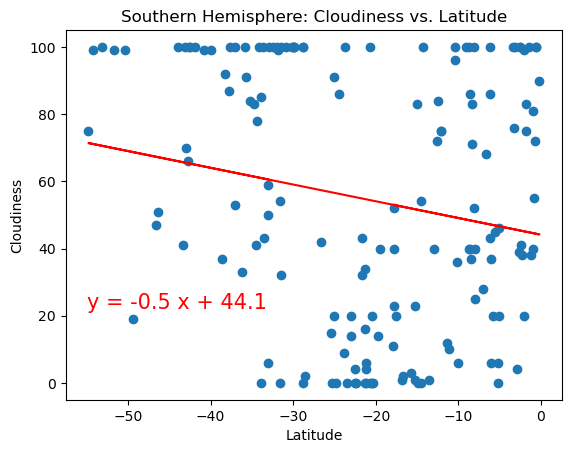

In [203]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.title(f"Southern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")

plot_linear_regression(x_values,y_values, 'Latitude', (-55,22))

**Discussion about the linear relationship:** The linear regression model for the Northern Hemisphere indicates that there is a very weak, negative correlation between latitude and cloudiness. The linear regression model for the Southern Hemisphere indicates that there is a slightly stronger negative correlation between latitude and cloudiness, meaning cloudiness may decrease as distance to the equator decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.04797138001806777


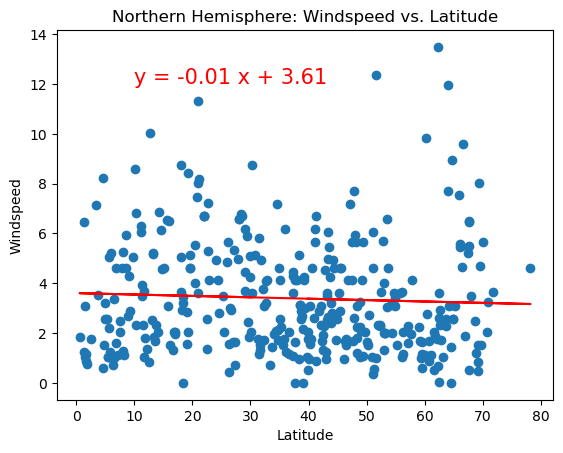

In [207]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plt.title(f"Northern Hemisphere: Windspeed vs. Latitude")
plt.ylabel("Windspeed")

plot_linear_regression(x_values,y_values, 'Latitude', (10,12))

The r^2-value is: -0.044225509362421075


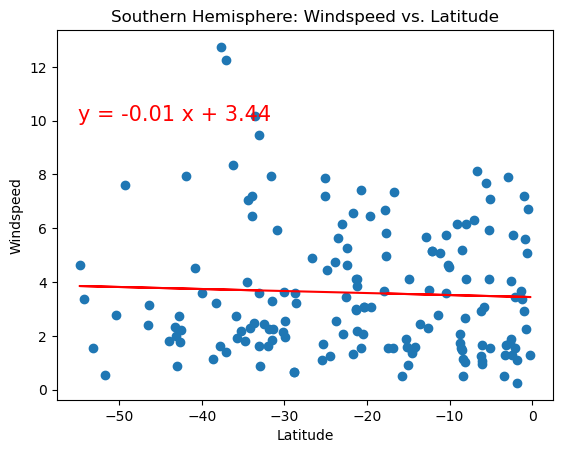

In [208]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plt.title(f"Southern Hemisphere: Windspeed vs. Latitude")
plt.ylabel("Windspeed")

plot_linear_regression(x_values,y_values, 'Latitude', (-55,10))

**Discussion about the linear relationship:** The linear regression models for both the Northern and Southern Hemispheres indicate that there is no correlation between latitude and windspeed.